In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns
#sns.set_style("ticks")
#from pylab import rcParams
#import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)

%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Загрузите случайную выборку из этого набора данных:

In [3]:
df = pd.read_csv("data/Crime_Data_2010_2017_small_sample.csv",
                 parse_dates=["Date Reported", "Date Occurred"])

![Карта LA](https://www.partneresi.com/sites/default/files/methane-zone-map-los-angeles.jpg)

In [11]:
!pip install geopandas

    100% |████████████████████████████████| 901kB 152kB/s ta 0:00:01
    100% |████████████████████████████████| 4.4MB 49kB/s ta 0:00:018
    100% |████████████████████████████████| 1.6MB 105kB/s a 0:00:011
    100% |████████████████████████████████| 21.6MB 101kB/s ta 0:00:01    52% |████████████████▊               | 11.3MB 71kB/s eta 0:02:25
  Running setup.py install for pyproj ... done
  Running setup.py install for munch ... done


In [29]:
!pip install descartes

In [12]:
import geopandas as gpd

In [20]:
la_geo_df = gpd.read_file("data/shapes")

In [21]:
la_geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1135 entries, 0 to 1134
Data columns (total 8 columns):
OBJECTID    1135 non-null int64
REPDIST     1135 non-null int64
PREC        1135 non-null int64
APREC       1135 non-null object
BUREAU      1135 non-null object
BASICCAR    1135 non-null object
TOOLTIP     1135 non-null object
geometry    1135 non-null object
dtypes: int64(3), object(5)
memory usage: 71.0+ KB


In [26]:
la_geo_df.head()

,OBJECTID,REPDIST,Area ID,APREC,BUREAU,BASICCAR,TOOLTIP,geometry
0,1,1901,19,MISSION,VALLEY BUREAU,19A1,Bureau: VALLEY BUREAU\nDistrict: 1901\nDivisio...,POLYGON ((-118.5073592270222 34.33464042438231...
1,2,1705,17,DEVONSHIRE,VALLEY BUREAU,17A35,Bureau: VALLEY BUREAU\nDistrict: 1705\nDivisio...,POLYGON ((-118.5073592270222 34.33464042438231...
2,3,1902,19,MISSION,VALLEY BUREAU,19A7,Bureau: VALLEY BUREAU\nDistrict: 1902\nDivisio...,POLYGON ((-118.4518247956019 34.32404830717866...
3,4,1903,19,MISSION,VALLEY BUREAU,19A7,Bureau: VALLEY BUREAU\nDistrict: 1903\nDivisio...,POLYGON ((-118.4518247956019 34.32404830717866...
4,5,1904,19,MISSION,VALLEY BUREAU,19A7,Bureau: VALLEY BUREAU\nDistrict: 1904\nDivisio...,POLYGON ((-118.4518247956019 34.32404830717866...


In [23]:
la_geo_df = la_geo_df.rename(columns={'PREC': "Area ID"})

In [24]:
gb_area_crimes = df.groupby("Area ID").size()

In [27]:
la_geo_df["crimes"] = la_geo_df["Area ID"].apply(lambda x: gb_area_crimes[x])

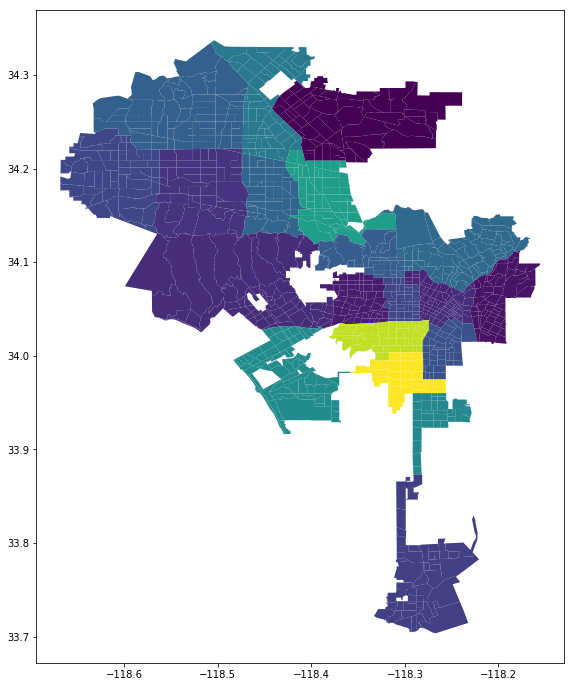

In [30]:
la_map = la_geo_df.plot(column="crimes", figsize=(12, 12));

In [31]:
def clean_coords(coords: "строка с координатами вида '(34.0699, -118.3511)'"):
    if (type(coords) == str) & (coords != "(0, 0)"):
        lat, lon = coords.split()
        lat = float(lat[1:-1])
        lon = float(lon[:-1])
        return lon, lat
    else:
        return None

In [32]:
df["Location"] = df["Location "].apply(clean_coords)

In [33]:
df = df.dropna(subset=["Location"])

In [34]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in df["Location"].tolist()]
crs = {'init': 'epsg:4326'}
crimes_geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

In [35]:
crimes_geo_df.crs

{'init': 'epsg:4326'}

In [36]:
la_geo_df.crs

{'init': 'epsg:4326'}

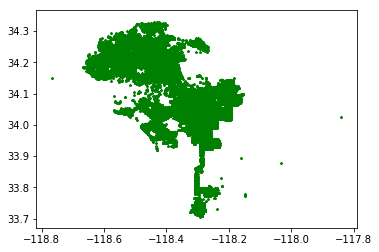

In [37]:
crimes_geo_df.plot(marker='*', color='green', markersize=5)

In [38]:
crimes_geo_df

,Unnamed: 0,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,...,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,Location,geometry
0,246798,100509940,2010-04-25,2010-04-25,1630,5,Harbor,529,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,CAL YACHT,MARINA SLIP D17,"(33.7753, -118.2456)","(-118.2456, 33.7753)",POINT (-118.2456 33.7753)
1,1179557,151917155,2015-08-27,2015-08-27,430,19,Mission,1917,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,Adult Other,626.0,NaN,NaN,NaN,14000 ASTORIA ST,NaN,"(34.312, -118.4383)","(-118.4383, 34.312)",POINT (-118.4383 34.312)
2,1527668,172008833,2017-04-04,2017-04-03,1000,20,Olympic,2021,310,BURGLARY,...,Invest Cont,310.0,NaN,NaN,NaN,500 LORRAINE BL,NaN,"(34.0653, -118.32)","(-118.32, 34.0653)",POINT (-118.32 34.0653)
3,94687,101117037,2010-08-03,2010-08-02,2120,11,Northeast,1107,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,1400 HEPNER AV,NaN,"(34.1318, -118.1957)","(-118.1957, 34.1318)",POINT (-118.1957 34.1318)
4,1376548,161711262,2016-06-02,2016-06-02,1240,17,Devonshire,1764,210,ROBBERY,...,Invest Cont,210.0,NaN,NaN,NaN,9300 TAMPA AV,NaN,"(34.244, -118.5583)","(-118.5583, 34.244)",POINT (-118.5583 34.244)
5,419135,111209609,2011-03-23,2011-03-22,1600,12,77th Street,1249,330,BURGLARY FROM VEHICLE,...,Invest Cont,330.0,NaN,NaN,NaN,DENVER,65TH ST,"(33.9806, -118.2838)","(-118.2838, 33.9806)",POINT (-118.2838 33.9806)
6,517013,120113534,2012-06-08,2012-06-08,605,1,Central,127,755,BOMB SCARE,...,Invest Cont,755.0,NaN,NaN,NaN,100 N LOS ANGELES ST,NaN,"(34.0515, -118.2424)","(-118.2424, 34.0515)",POINT (-118.2424 34.0515)
7,1292347,160912738,2016-06-21,2016-06-21,1700,9,Van Nuys,915,624,BATTERY - SIMPLE ASSAULT,...,Adult Other,624.0,NaN,NaN,NaN,6800 VAN NUYS BL,NaN,"(34.1939, -118.4487)","(-118.4487, 34.1939)",POINT (-118.4487 34.1939)
8,96767,101121633,2010-10-21,2010-10-21,1200,11,Northeast,1141,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,Invest Cont,626.0,NaN,NaN,NaN,1800 N ALEXANDRIA AV,NaN,"(34.1036, -118.2984)","(-118.2984, 34.1036)",POINT (-118.2984 34.1036)
9,1541119,170211374,2017-05-30,2017-05-29,1200,2,Rampart,279,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,...,Invest Cont,236.0,NaN,NaN,NaN,JAMES M WOOD BL,SUNBURY,"(34.0484, -118.2676)","(-118.2676, 34.0484)",POINT (-118.2676 34.0484)


<Figure size 1440x720 with 0 Axes>

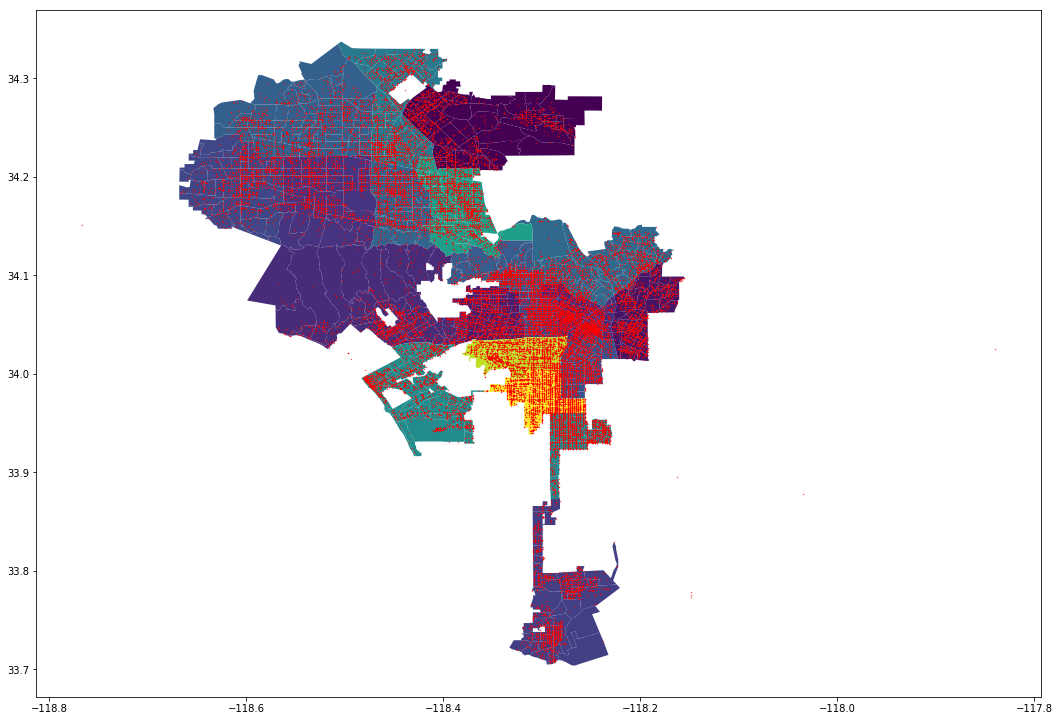

<Figure size 1440x720 with 0 Axes>

In [39]:
# Create Matplotlib figure
fig, ax = plt.subplots(figsize=(18, 18))

# Set Axes to equal (otherwise plot looks weird)
ax.set_aspect('equal')

# Plot GeoDataFrame on Axis ax
la_geo_df.plot(ax=ax, column="crimes")
crimes_geo_df.plot(ax=ax, marker='o', color='red', markersize=0.1)
plt.figure(figsize=(20,10))